# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-05-01 16:08:02.806912: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 16:08:02.807080: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 16:08:02.809584: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 16:08:02.836505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 16:08:03.385201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, boost=1, seed=42)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 12,960 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/50: accuracy 12.800%
Epoch 2/50: accuracy 15.000%
Epoch 3/50: accuracy 19.100%
Epoch 4/50: accuracy 13.100%
Epoch 5/50: accuracy 14.100%
Epoch 6/50: accuracy 14.900%
Epoch 7/50: accuracy 12.200%
Epoch 8/50: accuracy 11.600%
Epoch 9/50: accuracy 12.400%
Epoch 10/50: accuracy 11.800%
Epoch 11/50: accuracy 12.600%
Epoch 12/50: accuracy 15.000%
Epoch 13/50: accuracy 15.300%
Epoch 14/50: accuracy 14.600%
Epoch 15/50: accuracy 15.600%
Epoch 16/50: accuracy 14.600%
Epoch 17/50: accuracy 15.500%
Epoch 18/50: accuracy 17.100%
Epoch 19/50: accuracy 16.200%
Epoch 20/50: accuracy 17.100%
Epoch 21/50: accuracy 17.400%
Epoch 22/50: accuracy 17.500%
Epoch 23/50: accuracy 17.600%
Epoch 24/50: accuracy 17.500%
Epoch 25/50: accuracy 16.300%
Epoch 26/50: accuracy 15.600%
Epoch 27/50: accuracy 15.900%
Epoch 28/50: accuracy 15.800%
Epoch 29/50: accuracy 15.800%
Epoch 30/50: accuracy 15.400%
Epoch 31/50: accuracy 15.200%
Epoch 32/50: accuracy 14.600%
Epoch 33/50: accuracy 14.000%
Epoch 34/50: accura

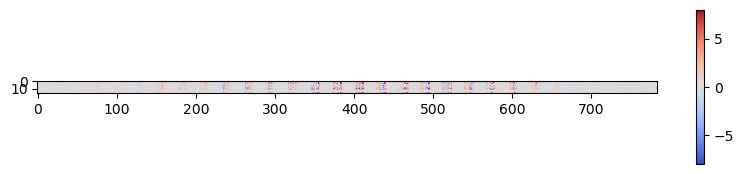

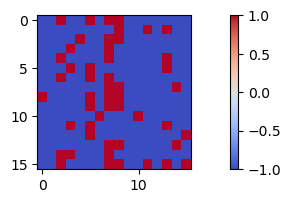

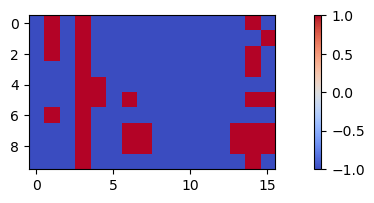

In [7]:
def show_weights(weights):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.show()

show_weights(model.input_weights)
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l])
show_weights(model.output_weights)

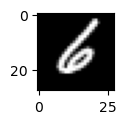

[255 255 255 255 255   0 255 255 255 255 255 255   0   0   0 255]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


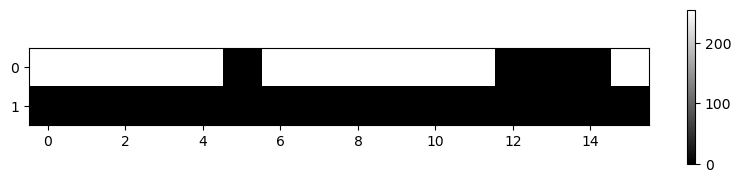

[0 0 0 0 0 0 0 0 0 0] --> 0


In [8]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.show()
for l in range(model.config["layers"]):
    print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="vertical")
plt.show()
print(model.last_outputs, "-->", model.last_answer)